#**This notebook provides a detailed explanation of linear regression assumptions.**

## To solve all assumptions of linear regression, you need to assess and address each assumption individually. Here are the key assumptions of linear regression and some strategies to address them:

1. Linearity
2. Mean of Residuals
3. Homoscedasticity (Constant Variance):
4. Normality of Residuals
5. No Perfect Multicollinearity
6. Autocorrelation of residuals

In [ ]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
# sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os

In [ ]:
data = pd.read_csv('/content/advertising.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

In [ ]:
sns.set(style = 'darkgrid')

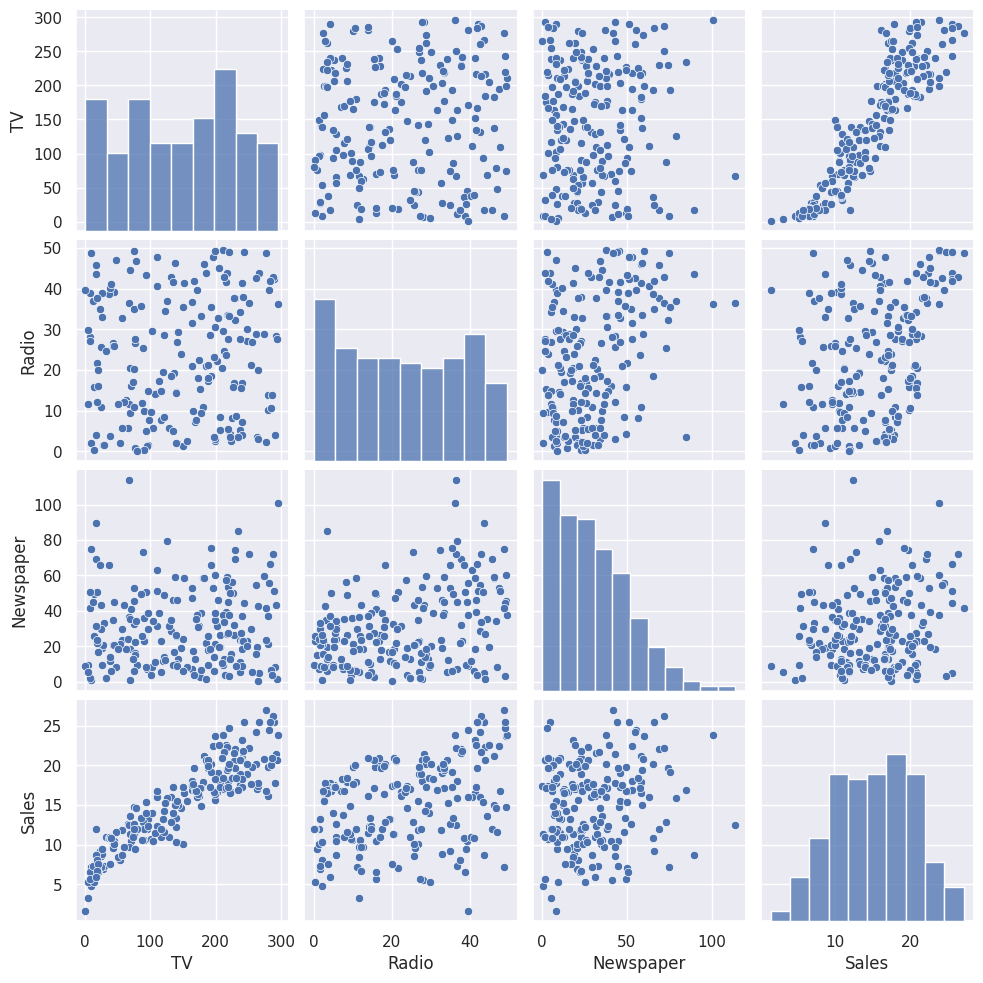

In [ ]:
sns.pairplot(data)

<Axes: >

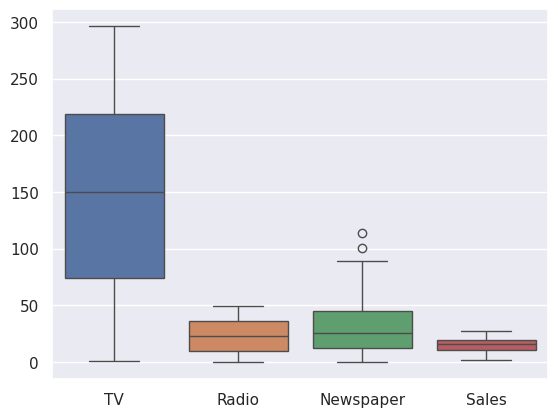

In [ ]:
sns.boxplot(data)

### Linearity

The relationship between the independent and dependent variables should be linear. We can use scatter plots to visually inspect the linearity between variables. So here we will check the relationship between independent varilables and our dependent variable "Sales"

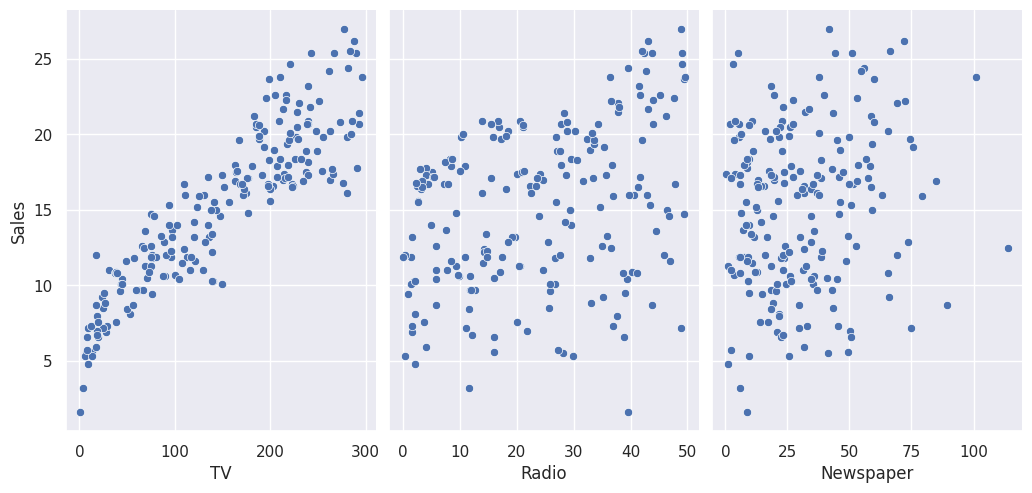

In [ ]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=5, aspect=0.7)

Looking at the plots, we can observe that with the Sales variable, none of the independent variables form an exactly linear shape, although TV and Radio do better than newspapers, which seem to have no different shape. As a result, it appears that a linear regression model is not the best match. A linear model may be unable to accurately represent the data in terms of variability,  accuracy, and so on.

**Note: If linearity is not observed, consider transforming variables (e.g., log transformation) or using polynomial regression.**

### Mean of Residuals

Residuals, as we know, are the disparities between the real and predicted values. One of the assumptions of linear regression is that the mean of the residuals will be zero. So let us find out.

In [ ]:
residuals = y-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -3.9968028886505634e-17


**Now, let's build a OLS (Ordinary Least Squares) regression, and it will help us solve further assumptions.**

In [ ]:
X=data.drop("Sales", axis=1) #independent variables
y=data["Sales"] # dependent variables

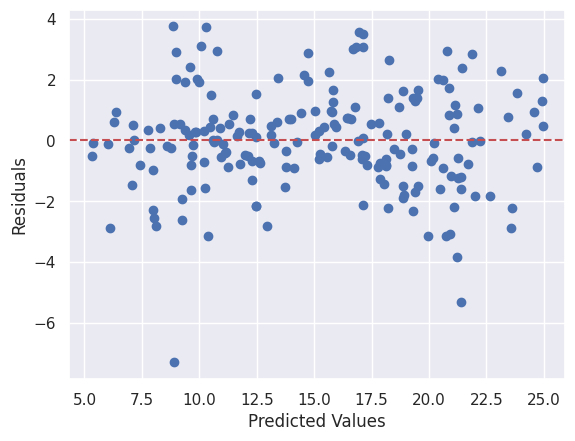

In [ ]:
X = sm.add_constant(X)  # Adding a constant to include the intercept in the model
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

# Plotting residuals
plt.scatter(predictions, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))

R squared: 0.9025912899684558


In [ ]:
residuals = y.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -3.9968028886505634e-17


**Now, let's build a Linear regression model, and it will help us solve further assumptions.**

In [ ]:
x = data.drop(["Sales"],axis=1)
y = data.Sales

In [ ]:
regression = linear_model.LinearRegression()
regression.fit(x,y)
y_pred = regression.predict(x)

In [ ]:
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))

In [ ]:
residuals = y.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

### Normality of Residuals

The residuals should follow a normal distribution. To address this:     Plot a histogram or Q-Q plot of residuals to assess normality.                 

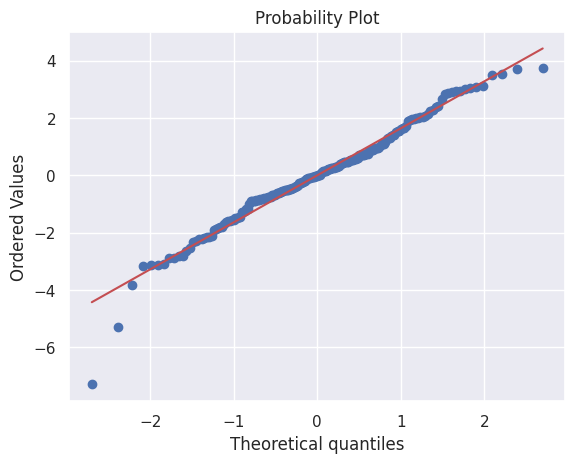

In [ ]:
stats.probplot(model.resid, dist="norm", plot=plt)
plt.show()

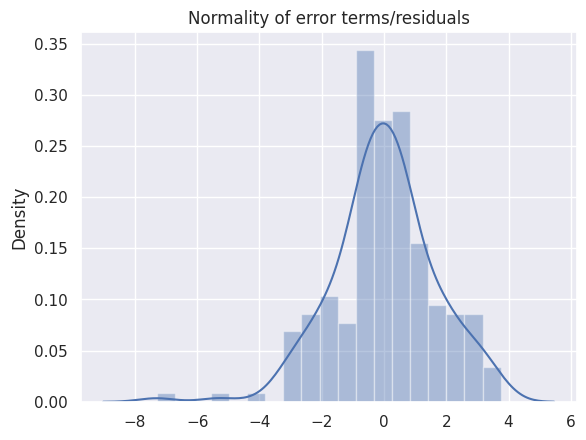

In [ ]:
p = sns.distplot(model.resid,kde=True)
p = plt.title('Normality of error terms/residuals')

For the amount of test points we used, the residual terms are quite normally distributed. Remember the central limit theorem, which states that as the sample size grows, the distribution tends to become normal. It is extremely difficult to obtain flawless curves and distributions from real-world data.  A skewness is also visible from the plot.

### Homoscedasticity

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

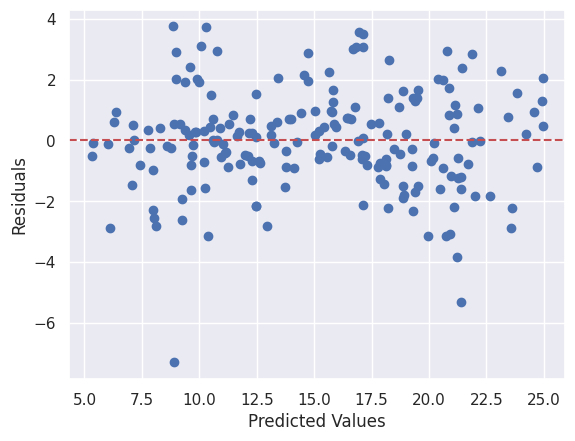

In [ ]:
# Scatter plot of residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Here we are testing for homoscedasticity using p-values from statistical tests such as the Breusch-Pagan test or the White test, the null and alternative hypotheses are as follows:

**Null Hypothesis (H0):** The null hypothesis typically assumes homoscedasticity, meaning that the variance of the residuals is constant across all levels of the independent variables. In other words, it assumes that there is no heteroscedasticity in the model.

**Alternative Hypothesis (H1):** The alternative hypothesis usually suggests the presence of heteroscedasticity, indicating that the variance of the residuals is not constant across all levels of the independent variables. It implies that there is a systematic change in the variance of the residuals.

If the p-value is less than a chosen significance level (0.05), we reject the null hypothesis and conclude that there is evidence of heteroscedasticity in the model.

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

# Testing homoscedasticity
_, p_value, _, _ = het_breuschpagan(model.resid, model.model.exog)
print('Breusch-Pagan Test p-value:', p_value)

_, p_value, _, _ = het_white(model.resid, model.model.exog)
print('het_white Test p-value:', p_value)

Breusch-Pagan Test p-value: 0.2637922004319978
het_white Test p-value: 0.018203803931681046


The White Test comes with a few limitations: it needs a lot of variables and hence can be quite time consuming, so using the White Test for a large dataset isn’t too practical and it would be easier to go for Breusch-Pagan Test.

What to do if there is Heteroscedasticity?

1. Outlier removal
2. Log transformation of x variables
3. Polynomial regresion

Here are the key assumptions of linear regression and some strategies to address them:

Linearity: The relationship between the independent and dependent variables should be linear. To address this:

Use scatter plots to visually inspect the linearity between variables.
If linearity is not observed, consider transforming variables (e.g., log transformation) or using polynomial regression.
Independence of Errors: The errors (residuals) should be independent of each other. To address this:

Check for autocorrelation in residuals using plots like autocorrelation function (ACF) plots.
If autocorrelation is present, consider using time-series models or adding lagged variables.
Homoscedasticity (Constant Variance): The variance of residuals should be constant across all levels of the independent variables. To address this:

Plot residuals against predicted values and independent variables to check for patterns.
If heteroscedasticity is observed, consider transforming the dependent variable or using robust standard errors.
Normality of Residuals: The residuals should follow a normal distribution. To address this:

Plot a histogram or Q-Q plot of residuals to assess normality.
If residuals are not normally distributed, consider transforming the dependent variable or using robust regression techniques.
No Multicollinearity: The independent variables should not be highly correlated with each other. To address this:

Calculate correlation coefficients between independent variables.
Use variance inflation factor (VIF) to detect multicollinearity, and consider removing highly correlated variables or using regularization techniques.
No Perfect Multicollinearity: There should be no exact linear relationships between independent variables. To address this:

Check for perfect multicollinearity using correlation matrices or VIF.
If perfect multicollinearity is detected, remove one of the correlated variables.